<a href="https://colab.research.google.com/github/StanleyLiangYork/Advance_NN_techniques/blob/main/basic_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

Create a neural network as class, then create a NN with the following weights and bias <p>
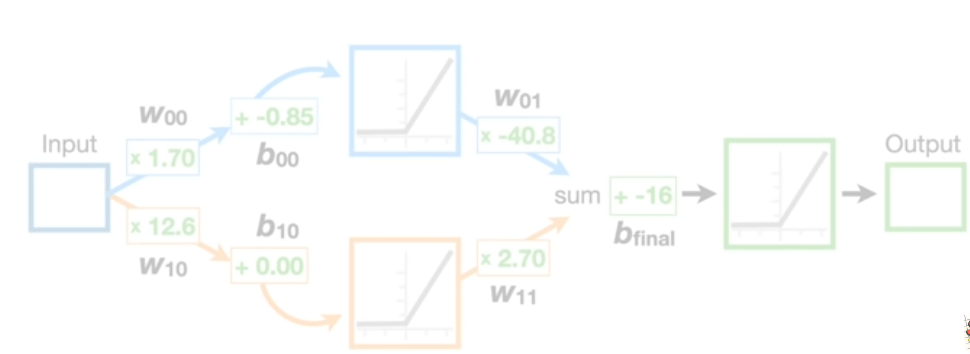

In [6]:
class BasicNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
    
    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.00), requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.70), requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(-16.00), requires_grad=False)

  # define the forward method to guide the data pass the architecture
  def forward(self, input):
    input_upper = input*self.w00+self.b00
    activate01 = F.relu(input_upper)
    scaled_upper = activate01*self.w01

    input_lower = input*self.w10+self.b10
    activate11 = F.relu(input_lower)
    scaled_lower = activate11*self.w11

    input_to_final = scaled_upper+scaled_lower+self.final_bias
    output = F.relu(input_to_final)

    return output


In [4]:
inputs = torch.linspace(start=0, end=1, steps=11)
inputs

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [7]:
model = BasicNN()

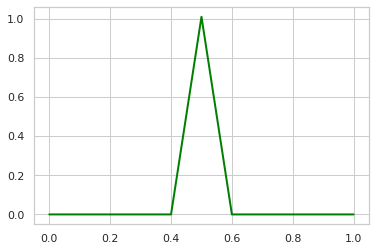

In [8]:
outputs = model(inputs)
sns.set(style="whitegrid")
sns.lineplot(x=inputs, y=outputs, color='green', linewidth=2)

make the NN trainable

In [36]:
class BasicNN_train(nn.Module):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
    
    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.00), requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.70), requires_grad=False)
    # set the tensor to zero makes untrainable
    self.final_bias = nn.Parameter(torch.tensor(0.00), requires_grad=True)

  # define the forward method to guide the data pass the architecture
  def forward(self, input):
    input_upper = input*self.w00+self.b00
    activate01 = F.relu(input_upper)
    scaled_upper = activate01*self.w01

    input_lower = input*self.w10+self.b10
    activate11 = F.relu(input_lower)
    scaled_lower = activate11*self.w11

    input_to_final = scaled_upper+scaled_lower+self.final_bias
    output = F.relu(input_to_final)

    return output

Text(0, 0.5, 'effectiveness')

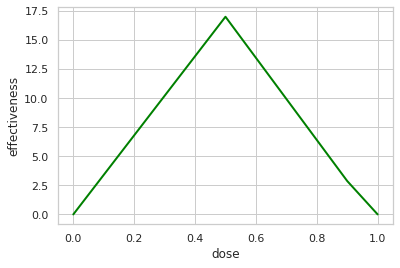

In [37]:
model = BasicNN_train()
outputs = model(inputs)
sns.set(style="whitegrid")
# set the y to detach() to get the value instead of the gradient
sns.lineplot(x=inputs, y=outputs.detach(), color='green', linewidth=2)
plt.xlabel("dose")
plt.ylabel("effectiveness")

create some data to optimize the BasicNN_train

In [38]:
data = torch.tensor([0., 0.2, 0.5, 1.])
label = torch.tensor([0., 0., 1., 0.])


setup the training iteration

In [39]:
optimizer = SGD(model.parameters(), lr=0.1)
print("final bias, before optimization: " + str(model.final_bias.data) + "\n")

final bias, before optimization: tensor(0.)



In [40]:
for epoch in range(100):
  total_loss = 0
  for iter in range(len(data)):
    input_i = data[iter]
    label_i = label[iter]

    output_i = model(input_i)
    # use squared loss
    loss = (output_i - label_i)**2
    loss.backward()
    total_loss += float(loss)

  if total_loss < 0.0001:
    print(f"Num of steps: {epoch}" )
    break

  # add the penalty to the model parameter
  optimizer.step()
  # clear the gradient for the next epoch
  optimizer.zero_grad()

  print(f"Step: {epoch} Final Bias: {model.final_bias.data} \n")

print(f"Final bias after train: {model.final_bias.data} \n")


Step: 0 Final Bias: -4.562800407409668 

Step: 1 Final Bias: -7.300480365753174 

Step: 2 Final Bias: -9.042384147644043 

Step: 3 Final Bias: -10.435907363891602 

Step: 4 Final Bias: -11.550725936889648 

Step: 5 Final Bias: -12.442581176757812 

Step: 6 Final Bias: -13.156064987182617 

Step: 7 Final Bias: -13.726852416992188 

Step: 8 Final Bias: -14.18348217010498 

Step: 9 Final Bias: -14.548786163330078 

Step: 10 Final Bias: -14.841029167175293 

Step: 11 Final Bias: -15.074823379516602 

Step: 12 Final Bias: -15.261858940124512 

Step: 13 Final Bias: -15.411487579345703 

Step: 14 Final Bias: -15.531189918518066 

Step: 15 Final Bias: -15.626952171325684 

Step: 16 Final Bias: -15.703561782836914 

Step: 17 Final Bias: -15.764849662780762 

Step: 18 Final Bias: -15.81387996673584 

Step: 19 Final Bias: -15.853103637695312 

Step: 20 Final Bias: -15.884483337402344 

Step: 21 Final Bias: -15.909586906433105 

Step: 22 Final Bias: -15.929669380187988 

Step: 23 Final Bias: -15.9

Text(0, 0.5, 'effectiveness')

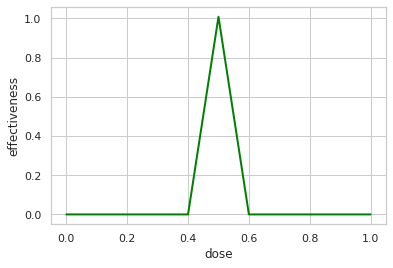

In [42]:
outputs = model(inputs)
sns.lineplot(x=inputs, y=outputs.detach(), color='green', linewidth=2)
plt.xlabel("dose")
plt.ylabel("effectiveness")